## Predicting the Mode of transport

### Imports

In [1]:
import numpy as np
import pandas as pd
#pd.set_option('max_columns', None)

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf

from sklearn.metrics import confusion_matrix, classification_report

In [2]:
pd.set_option('display.max_columns', None) ## So that it shows all the columns in the dataframe form.

In [3]:

data = pd.read_csv('E:\GitHub_Repos\Projects\SupplyChainModePrediction\SCMS_Delivery_History_Dataset.csv')
data.head(5)

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,PQ First Sent to Client Date,PO Sent to Vendor Date,Scheduled Delivery Date,Delivered to Client Date,Delivery Recorded Date,Product Group,Sub Classification,Vendor,Item Description,Molecule/Test Type,Brand,Dosage,Dosage Form,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,2-Jun-06,2-Jun-06,2-Jun-06,HRDT,HIV test,RANBAXY Fine Chemicals LTD.,"HIV, Reveal G3 Rapid HIV-1 Antibody Test, 30 T...","HIV, Reveal G3 Rapid HIV-1 Antibody Test",Reveal,NaN,Test kit,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,14-Nov-06,14-Nov-06,14-Nov-06,ARV,Pediatric,Aurobindo Pharma Limited,"Nevirapine 10mg/ml, oral suspension, Bottle, 2...",Nevirapine,Generic,10mg/ml,Oral suspension,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,Pre-PQ Process,Date Not Captured,27-Aug-06,27-Aug-06,27-Aug-06,HRDT,HIV test,Abbott GmbH & Co. KG,"HIV 1/2, Determine Complete HIV Kit, 100 Tests","HIV 1/2, Determine Complete HIV Kit",Determine,NaN,Test kit,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,1-Sep-06,1-Sep-06,1-Sep-06,ARV,Adult,SUN PHARMACEUTICAL INDUSTRIES LTD (RANBAXY LAB...,"Lamivudine 150mg, tablets, 60 Tabs",Lamivudine,Generic,150mg,Tablet,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,11-Aug-06,11-Aug-06,11-Aug-06,ARV,Adult,Aurobindo Pharma Limited,"Stavudine 30mg, capsules, 60 Caps",Stavudine,Generic,30mg,Capsule,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            10324 non-null  int64  
 1   Project Code                  10324 non-null  object 
 2   PQ #                          10324 non-null  object 
 3   PO / SO #                     10324 non-null  object 
 4   ASN/DN #                      10324 non-null  object 
 5   Country                       10324 non-null  object 
 6   Managed By                    10324 non-null  object 
 7   Fulfill Via                   10324 non-null  object 
 8   Vendor INCO Term              10324 non-null  object 
 9   Shipment Mode                 9964 non-null   object 
 10  PQ First Sent to Client Date  10324 non-null  object 
 11  PO Sent to Vendor Date        10324 non-null  object 
 12  Scheduled Delivery Date       10324 non-null  object 
 13  D

Missing Values

In [8]:
data.isna().sum().sort_values(ascending=False)

Dosage                          1736
Shipment Mode                    360
Line Item Insurance (USD)        287
Molecule/Test Type                 0
Brand                              0
Dosage Form                        0
Unit of Measure (Per Pack)         0
Line Item Quantity                 0
Line Item Value                    0
Vendor                             0
Pack Price                         0
Unit Price                         0
Manufacturing Site                 0
First Line Designation             0
Weight (Kilograms)                 0
Freight Cost (USD)                 0
Item Description                   0
ID                                 0
Project Code                       0
Product Group                      0
Delivery Recorded Date             0
Delivered to Client Date           0
Scheduled Delivery Date            0
PO Sent to Vendor Date             0
PQ First Sent to Client Date       0
Vendor INCO Term                   0
Fulfill Via                        0
M

Also to get the percentage of the missing values, lets return the means of the columns

In [9]:
data.isna().mean().sort_values(ascending=False)

Dosage                          0.168152
Shipment Mode                   0.034870
Line Item Insurance (USD)       0.027799
Molecule/Test Type              0.000000
Brand                           0.000000
Dosage Form                     0.000000
Unit of Measure (Per Pack)      0.000000
Line Item Quantity              0.000000
Line Item Value                 0.000000
Vendor                          0.000000
Pack Price                      0.000000
Unit Price                      0.000000
Manufacturing Site              0.000000
First Line Designation          0.000000
Weight (Kilograms)              0.000000
Freight Cost (USD)              0.000000
Item Description                0.000000
ID                              0.000000
Project Code                    0.000000
Product Group                   0.000000
Delivery Recorded Date          0.000000
Delivered to Client Date        0.000000
Scheduled Delivery Date         0.000000
PO Sent to Vendor Date          0.000000
PQ First Sent to

# Feature Engineering

### Missing Values

Shipment Modes, Dosage and Line Item Insurance have missing values in them. Now, here our target column also contains missing values and we dont wanna fill the model with missing rows while training. So we are gonna drop the rows containing missing values for atleast the training dataset.

In [10]:
df = data.copy()
    # As ID column is not gonna add any value to the model we are gonna build, so lets drop the ID column.
df = df.drop('ID', axis=1)


In [11]:
condition = df['Shipment Mode'].isnull()
df_missing_targets = df[condition]
df_missing_targets.head()

,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,PQ First Sent to Client Date,PO Sent to Vendor Date,Scheduled Delivery Date,Delivered to Client Date,Delivery Recorded Date,Product Group,Sub Classification,Vendor,Item Description,Molecule/Test Type,Brand,Dosage,Dosage Form,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
16,102-NG-T01,Pre-PQ Process,SCMS-354,ASN-608,Nigeria,PMO - US,Direct Drop,CIP,NaN,Pre-PQ Process,Date Not Captured,7-May-07,7-May-07,7-May-07,HRDT,HIV test,ACCOUN NIGERIA LIMITED,"HIV 1/2, Determine Complete HIV Kit, 100 Tests","HIV 1/2, Determine Complete HIV Kit",Determine,NaN,Test kit,100,1500,120000.00,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,Weight Captured Separately,Freight Included in Commodity Cost,192.00
31,116-ZA-T01,Pre-PQ Process,SCMS-14050,ASN-1251,South Africa,PMO - US,Direct Drop,DDP,NaN,Pre-PQ Process,11/12/07,29-Jan-08,29-Jan-08,29-Jan-08,ARV,Pediatric,"JSI R&T INSTITUTE, INC.","Zidovudine 10mg/ml [Retrovir], oral solution, ...",Zidovudine,Retrovir,10mg/ml,Oral solution,200,40,317.60,7.94,0.04,GSK Mississauga (Canada),Yes,Weight Captured Separately,Freight Included in Commodity Cost,0.51
36,116-ZA-T01,Pre-PQ Process,SCMS-16600,ASN-1520,South Africa,PMO - US,Direct Drop,DDP,NaN,Pre-PQ Process,1/4/08,21-Jan-08,4-Jan-08,4-Jan-08,ARV,Pediatric,"JSI R&T INSTITUTE, INC.","Stavudine 1mg/ml [Zerit], powder for oral solu...",Stavudine,Zerit,1mg/ml,Powder for oral solution,200,200,340.00,1.70,0.01,"BMS Meymac, France",Yes,Weight Captured Separately,Freight Included in Commodity Cost,0.54
42,117-ET-T01,Pre-PQ Process,SCMS-18430,ASN-1465,Ethiopia,PMO - US,Direct Drop,DDP,NaN,Pre-PQ Process,2/29/08,11-Mar-08,11-Mar-08,11-Mar-08,HRDT,HIV test,TURE PHARMACEUTICALS & MEDICAL SUPPLIES P.L.C.,"HIV 1/2, Capillus HIV Kit, 100 Tests","HIV 1/2, Capillus HIV Kit",Capillus,NaN,Test kit,100,63,13399.25,212.69,2.13,"Trinity Biotech, Plc",Yes,Weight Captured Separately,Freight Included in Commodity Cost,21.44
50,116-ZA-T01,Pre-PQ Process,SCMS-21460,ASN-1667,South Africa,PMO - US,Direct Drop,DDP,NaN,Pre-PQ Process,4/4/08,25-Apr-08,7-Apr-08,7-Apr-08,ARV,Pediatric,S. BUYS WHOLESALER,"Didanosine 25mg [Videx], chewable tablets, 60 ...",Didanosine,Videx,25mg,Chewable/dispersible tablet,60,6,77.10,12.85,0.21,"BMS Meymac, France",Yes,Weight Captured Separately,Freight Included in Commodity Cost,0.12


We are gonna preserve the data to concat this with our test dataset. Now lets prepare the train data.

In [12]:
df_missing_targets_index =df_missing_targets.index
df_missing_targets_index

Int64Index([  16,   31,   36,   42,   50,  157,  158,  165,  186,  187,
            ...
            2526, 2527, 2528, 2529, 2530, 2539, 2552, 2561, 2574, 2610],
           dtype='int64', length=360)

In [13]:
df = df.drop(df_missing_targets_index, axis=0).reset_index(drop=True)

Now, Lets fill the missing values for 'dosage' and 'line items insurance' columns.<br>
Now, as the dosage column contains different values from a huge range. So it does not make much sense to fill up the missing values with mean. So, kets try to fill up with the most occurence values.

In [14]:
len(df['Dosage'].unique())

55

So, there are 55 unique values among 9244 rows. So, it will be better to fill the missing values with the most occurence values.

In [15]:
df.Dosage = df.Dosage.fillna(df.Dosage.mode()[0]) ##in case we got multiple modes, so we are using first mode value to fill the columns.
df.isna().sum().sort_values(ascending=False)

Line Item Insurance (USD)       181
PQ #                              0
Freight Cost (USD)                0
Weight (Kilograms)                0
First Line Designation            0
Manufacturing Site                0
Unit Price                        0
Pack Price                        0
Line Item Value                   0
Line Item Quantity                0
Unit of Measure (Per Pack)        0
Dosage Form                       0
Dosage                            0
Brand                             0
Molecule/Test Type                0
Item Description                  0
Project Code                      0
Sub Classification                0
Product Group                     0
Delivery Recorded Date            0
Delivered to Client Date          0
Scheduled Delivery Date           0
PO Sent to Vendor Date            0
PQ First Sent to Client Date      0
Shipment Mode                     0
Vendor INCO Term                  0
Fulfill Via                       0
Managed By                  

Now, lets fill the Line Item Insurance column values with mean value of the column.

In [16]:
df['Line Item Insurance (USD)'] = df['Line Item Insurance (USD)'].fillna(df['Line Item Insurance (USD)'].mean())

In [17]:
df.isna().sum().sort_values(ascending=False)

Project Code                    0
PQ #                            0
Freight Cost (USD)              0
Weight (Kilograms)              0
First Line Designation          0
Manufacturing Site              0
Unit Price                      0
Pack Price                      0
Line Item Value                 0
Line Item Quantity              0
Unit of Measure (Per Pack)      0
Dosage Form                     0
Dosage                          0
Brand                           0
Molecule/Test Type              0
Item Description                0
Vendor                          0
Sub Classification              0
Product Group                   0
Delivery Recorded Date          0
Delivered to Client Date        0
Scheduled Delivery Date         0
PO Sent to Vendor Date          0
PQ First Sent to Client Date    0
Shipment Mode                   0
Vendor INCO Term                0
Fulfill Via                     0
Managed By                      0
Country                         0
ASN/DN #      

So, all the missing values are handled.

Lets look at all the object type columns which need to be encoded before feeding into a neural network.

## Handling Categorical Features

In [18]:
df.select_dtypes('object').columns

Index(['Project Code', 'PQ #', 'PO / SO #', 'ASN/DN #', 'Country',
       'Managed By', 'Fulfill Via', 'Vendor INCO Term', 'Shipment Mode',
       'PQ First Sent to Client Date', 'PO Sent to Vendor Date',
       'Scheduled Delivery Date', 'Delivered to Client Date',
       'Delivery Recorded Date', 'Product Group', 'Sub Classification',
       'Vendor', 'Item Description', 'Molecule/Test Type', 'Brand', 'Dosage',
       'Dosage Form', 'Manufacturing Site', 'First Line Designation',
       'Weight (Kilograms)', 'Freight Cost (USD)'],
      dtype='object')


#### DATE COLUMNS

First lets look at the date columns.

In [19]:
date_features = [
    'PQ First Sent to Client Date',
    'PO Sent to Vendor Date',
    'Scheduled Delivery Date',
    'Delivered to Client Date',
    'Delivery Recorded Date'
]
for column in date_features:
    print(column, pd.to_datetime(df[column], errors='coerce').isna().mean())

PQ First Sent to Client Date 0.23293857888398234
PO Sent to Vendor Date 0.5436571657968687
Scheduled Delivery Date 0.0
Delivered to Client Date 0.0
Delivery Recorded Date 0.0


So, one column contains alomst 25% missing values and another column contains 50% of missing values. So, we dont have any better options but to drop them.

In [20]:
df.drop(['PQ First Sent to Client Date','PO Sent to Vendor Date'], axis=1, inplace = True)

And now, to use the remaining date columns, lets extract the year, month and day from the date columns.

In [21]:
new_date_features = ['Scheduled Delivery Date','Delivered to Client Date','Delivery Recorded Date']
for column in new_date_features :
    df[column] = pd.to_datetime(df[column]) 
    df[column + 'year'] = df[column].apply(lambda dates : dates.year)
    df[column + 'month'] = df[column].apply(lambda dates : dates.month)
    df[column + 'day'] = df[column].apply(lambda dates : dates.day)
    df.drop(column, axis=1, inplace=True)

So, the dates columns are taken care of, now lets look at the other object columns.

In [22]:
df.select_dtypes('object').sample(10)

,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,Product Group,Sub Classification,Vendor,Item Description,Molecule/Test Type,Brand,Dosage,Dosage Form,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD)
2988,108-VN-T30,FPQ-11417,SCMS-174380,ASN-18759,Vietnam,PMO - US,Direct Drop,EXW,Air,ARV,Adult,HETERO LABS LIMITED,"Nevirapine 200mg, tablets, 60 Tabs",Nevirapine,Generic,200mg,Tablet,Hetero Unit III Hyderabad IN,Yes,1726,11984.91
6159,161-ZA-T30,FPQ-5303,SCMS-68910,ASN-7470,South Africa,PMO - US,Direct Drop,DDP,Air,ARV,Adult,Aurobindo Pharma Limited,"Efavirenz 600mg, tablets, 30 Tabs",Efavirenz,Generic,600mg,Tablet,"Aurobindo Unit III, India",Yes,4507,5886.96
8620,104-CI-T30,FPQ-5925,SO-37120,DN-2033,Côte d'Ivoire,PMO - US,From RDC,N/A - From RDC,Truck,ARV,Adult,SCMS from RDC,"Lamivudine/Zidovudine 150/300mg, tablets, 60 Tabs",Lamivudine/Zidovudine,Generic,150/300mg,Tablet - FDC,Hetero Unit III Hyderabad IN,No,See DN-2033 (ID#:82922),See DN-2033 (ID#:82922)
467,116-ZA-T01,Pre-PQ Process,SCMS-40810,ASN-3634,South Africa,PMO - US,Direct Drop,DDP,Air,ARV,Adult,S. BUYS WHOLESALER,"Nevirapine 200mg [Viramune], tablets, 60 Tabs",Nevirapine,Viramune,200mg,Tablet,"Boehringer Ing., Koropi, GR",No,Weight Captured Separately,Freight Included in Commodity Cost
3420,108-VN-T30,FPQ-6818,SCMS-97850,ASN-11024,Vietnam,PMO - US,Direct Drop,EXW,Air,ARV,Adult,MYLAN LABORATORIES LTD (FORMERLY MATRIX LABORA...,"Zidovudine 300mg, tablets, 60 Tabs",Zidovudine,Generic,300mg,Tablet,Mylan (formerly Matrix) Nashik,No,See ASN-11024 (ID#:15149),See ASN-11024 (ID#:15149)
1785,114-UG-T01,Pre-PQ Process,SO-30080,DN-1322,Uganda,PMO - US,From RDC,N/A - From RDC,Air,ARV,Adult,SCMS from RDC,"Lamivudine/Nevirapine/Stavudine 150/200/30mg, ...",Lamivudine/Nevirapine/Stavudine,Generic,150/200/30mg,Tablet - FDC,"Strides, Bangalore, India.",Yes,322,3017.15
342,117-ET-T01,Pre-PQ Process,SCMS-32630,ASN-3156,Ethiopia,PMO - US,Direct Drop,EXW,Air,HRDT,HIV test,"SHANGHAI KEHUA BIOENGINEERING CO.,LTD. (KHB)","HIV 1/2, SKB Colloidal Gold, Diagnostic Kit, A...","HIV 1/2, Colloidal Gold, Diagnostic Kit, Antibody",Colloidal Gold,300mg,Test kit,"KHB Test Kit Facility, Shanghai China",Yes,2535,20083.74
4507,161-ZA-T30,FPQ-6262,SCMS-83830,ASN-9942,South Africa,PMO - US,Direct Drop,DDP,Ocean,ARV,Adult,Aurobindo Pharma Limited,"Lamivudine/Zidovudine 150/300mg, tablets, 60 Tabs",Lamivudine/Zidovudine,Generic,150/300mg,Tablet - FDC,"Aurobindo Unit III, India",Yes,2275,3073.74
94,116-ZA-T01,Pre-PQ Process,SCMS-41060,ASN-3624,South Africa,PMO - US,Direct Drop,DDP,Air,ARV,Pediatric,S. BUYS WHOLESALER,"Stavudine 1mg/ml [Zerit], powder for oral solu...",Stavudine,Zerit,1mg/ml,Powder for oral solution,"BMS Meymac, France",Yes,Weight Captured Separately,Freight Included in Commodity Cost
4829,104-CI-T30,FPQ-15618,SCMS-272200,ASN-32748,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,HRDT,HIV test,"Orgenics, Ltd","HIV 1/2, Determine Complete HIV Kit, 100 Tests","HIV 1/2, Determine Complete HIV Kit",Determine,300mg,Test kit,"Alere Medical Co., Ltd.",Yes,2836,Freight Included in Commodity Cost


#### WEIGHT AND FRIEGHT COLUMNS

So, we can see there are strings also in the two columns weights and freight_cost. Now lets look at what percentages of the columns are contained with these non numeric values.

In [23]:
columns = ['Weight (Kilograms)','Freight Cost (USD)']
for column in columns:
    df[column+'numeric'] = pd.to_numeric(df[column], errors='coerce')  ## This will return NaN for those, couldnt be converted into numerics
    df.drop([column],axis=1,inplace=True)
    print(column,':',df[column+'numeric'].isna().mean())

Weight (Kilograms) : 0.3818747490967483
Freight Cost (USD) : 0.3991368928141309


##### <b>MISSING VALUE HANDLING for these two columns

* So, its pretty much a lot NaN values in the two column. Either we can drop the columns simply or, we can fill it somehow. So, first let's try to fill up instead of si,ply dropping.<br>
* Lets first try to find if there's any correlations of these two columns with any other columns or not.<br>
* If there's a correlation between the numeric columns and freight cost, weigths then we can sort the numerical colummns and then apply forward filling or backward filling to fill the missing values. 

For that first removing all the NaN rows and then apply .corr method or posibly a heatmap.

In [24]:
df_temp = df.dropna(how='any', axis=0)
df_temp_corr = df_temp.corr()

dataframe.corr will automatically calculate the Pearson r correlation ie. correlation between numeric and numeric columns only ie. between non object columns only.

In [25]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5964 entries, 0 to 9956
Data columns (total 36 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Project Code                   5964 non-null   object 
 1   PQ #                           5964 non-null   object 
 2   PO / SO #                      5964 non-null   object 
 3   ASN/DN #                       5964 non-null   object 
 4   Country                        5964 non-null   object 
 5   Managed By                     5964 non-null   object 
 6   Fulfill Via                    5964 non-null   object 
 7   Vendor INCO Term               5964 non-null   object 
 8   Shipment Mode                  5964 non-null   object 
 9   Product Group                  5964 non-null   object 
 10  Sub Classification             5964 non-null   object 
 11  Vendor                         5964 non-null   object 
 12  Item Description               5964 non-null   o

So, there are 17 non object columns

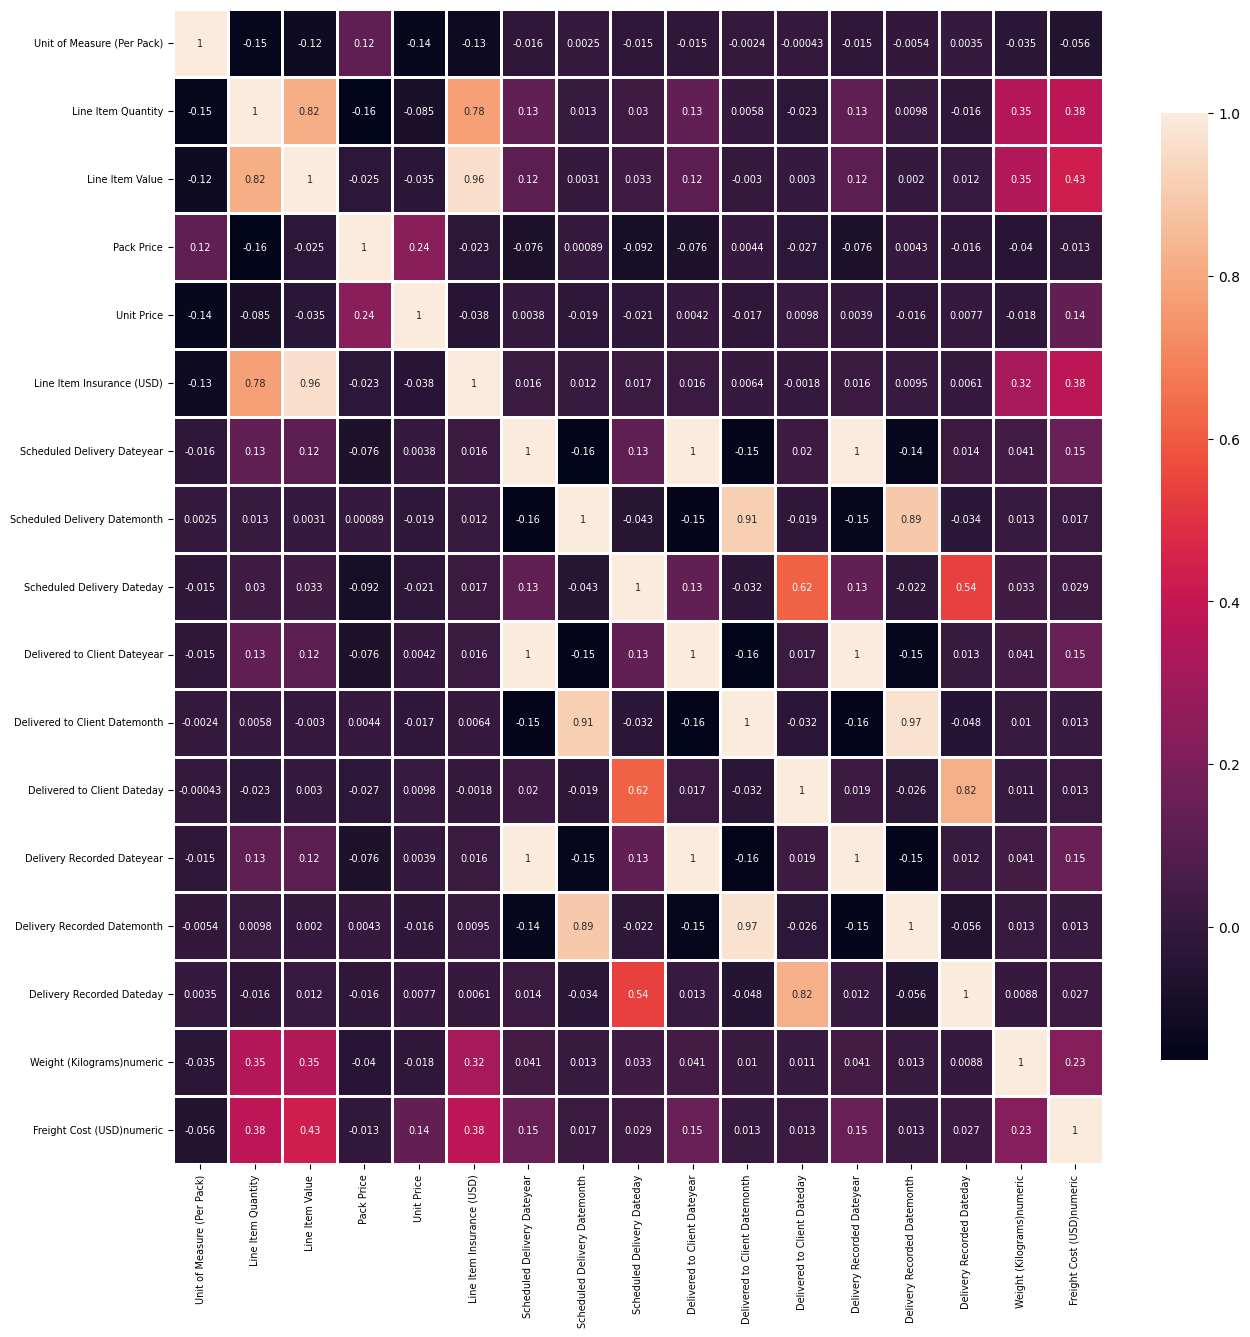

In [26]:
fig = plt.figure(figsize = (15,15))
fig = sns.heatmap(df_temp_corr, linewidths=1, annot=True, annot_kws = {'fontsize':7},cbar_kws={"shrink": .82}  )
fig.set_xticklabels(fig.get_xmajorticklabels(),fontsize=7)
fig.set_yticklabels(fig.get_ymajorticklabels(),fontsize=7)
plt.show()

So, we can see there are also not a huge positive correlations with any columns, But still lets fill up the Weight and Freight columns on the basis of three columns 'Line Item Value', 'Line Item Quantity', "line Item Insurance'(as they have heighests correlatations of around 30% to 40%) 

In [27]:
df_sorted = df.sort_values(['Line Item Quantity','Line Item Value','Line Item Insurance (USD)'], ascending=True)

In [28]:
df_sorted['Weight (Kilograms)numeric'].fillna(method = 'ffill',inplace=True)
df_sorted['Freight Cost (USD)numeric'].fillna(method = 'ffill',inplace=True)

Thus we filled the missing values in 'Weight' and 'Freight Values' columns.

#### OTHER CATEGORICAL COLUMNS

Now, lets find the unique values for a particular column.

In [29]:
{column : len(df_sorted[column].unique()) for column in df_sorted.select_dtypes('object').columns}

{'Project Code': 142,
 'PQ #': 1237,
 'PO / SO #': 6013,
 'ASN/DN #': 6804,
 'Country': 43,
 'Managed By': 4,
 'Fulfill Via': 2,
 'Vendor INCO Term': 8,
 'Shipment Mode': 4,
 'Product Group': 5,
 'Sub Classification': 6,
 'Vendor': 72,
 'Item Description': 183,
 'Molecule/Test Type': 85,
 'Brand': 47,
 'Dosage': 54,
 'Dosage Form': 17,
 'Manufacturing Site': 88,
 'First Line Designation': 2}

Now we can easily remove the columns with unique values more than 1000 or 2000, one hot encoding of those columns will generate a lot of extra columns which will make the model slow a lot. But first lets try to analyze the specific columns with large number of unique values.

In [30]:
df_sorted.select_dtypes('object').head(4)

,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,Product Group,Sub Classification,Vendor,Item Description,Molecule/Test Type,Brand,Dosage,Dosage Form,Manufacturing Site,First Line Designation
1156,100-ZW-T01,Pre-PQ Process,SO-1207,DN-424,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Air,ARV,Adult,SCMS from RDC,"Lamivudine/Stavudine 150/30mg, tablets, 30 Tabs",Lamivudine/Stavudine,Generic,150/30mg,Tablet - FDC,"Cipla, Goa, India",Yes
3371,116-ZA-T30,FPQ-15950,SCMS-277982,ASN-32412,South Africa,PMO - US,Direct Drop,DDP,Truck,ARV,Pediatric,PHARMACY DIRECT,"Ritonavir 80mg/ml [Norvir], oral solution, coo...",Ritonavir,Norvir,80mg/ml,Oral solution,ABBVIE (Abbott) France,Yes
477,116-ZA-T01,Pre-PQ Process,SCMS-41150,ASN-3759,South Africa,PMO - US,Direct Drop,DDP,Air,ARV,Pediatric,S. BUYS WHOLESALER,"Ritonavir 80mg/ml [Norvir], oral solution, coo...",Ritonavir,Norvir,80mg/ml,Oral solution,ABBVIE (Abbott) France,Yes
8013,151-NG-T30,FPQ-14156,SO-48893,DN-4098,Nigeria,PMO - US,From RDC,N/A - From RDC,Air Charter,ARV,Adult,SCMS from RDC,Lamivudine/Nevirapine/Zidovudine 150/200/300mg...,Lamivudine/Nevirapine/Zidovudine,Generic,150/300/200mg,Tablet - FDC,"Cipla, Goa, India",No


Lets find out the correlation between 'PQ #', 'PO SO #', 'ASN / DN #' and our target variable 'Shipment Mode'. Now as the columns are not numeric so we cant apply usual <b>Pearson's Correlation</b>. We have to apply <b>Cramer's V</b> or <b>Theil's U</b> methods to find the strength of the <b>Association</b>. 

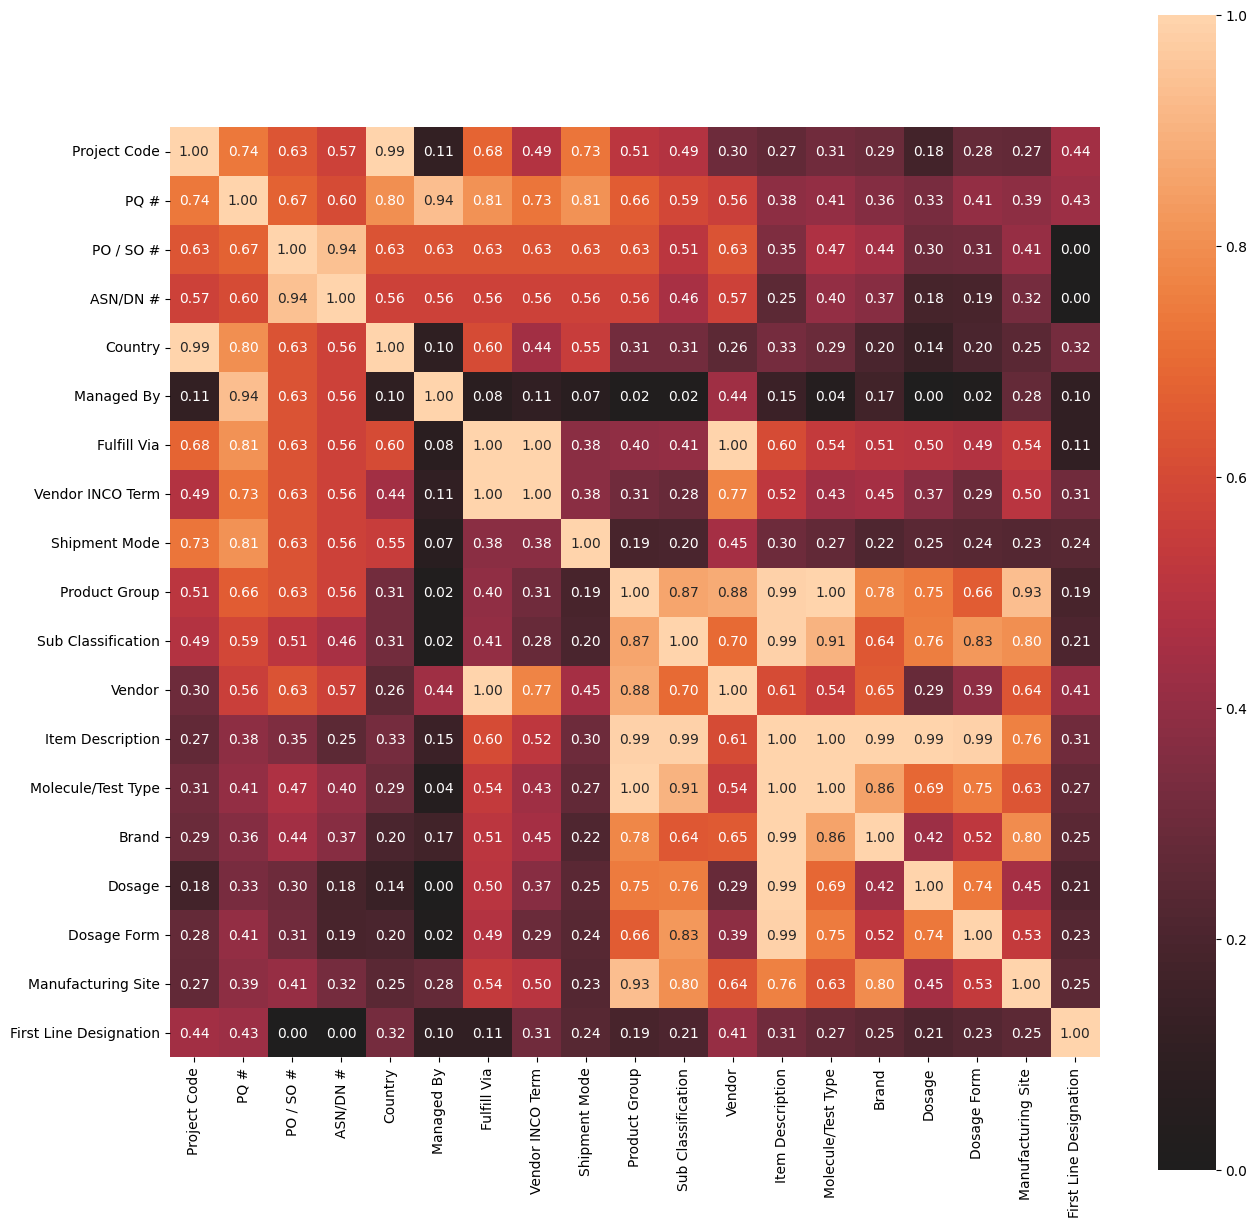

{'corr':                         Project Code      PQ #  PO / SO #  ASN/DN #   Country  \
 Project Code                1.000000  0.741237   0.634240  0.567210  0.994998   
 PQ #                        0.741237  1.000000   0.672854  0.601743  0.798430   
 PO / SO #                   0.634240  0.672854   1.000000  0.940068  0.631067   
 ASN/DN #                    0.567210  0.601743   0.940068  1.000000  0.564372   
 Country                     0.994998  0.798430   0.631067  0.564372  1.000000   
 Managed By                  0.113536  0.936058   0.629831  0.563266  0.100029   
 Fulfill Via                 0.684937  0.805629   0.629768  0.563210  0.602304   
 Vendor INCO Term            0.487853  0.733158   0.629957  0.563380  0.441236   
 Shipment Mode               0.731576  0.811887   0.629831  0.563266  0.548301   
 Product Group               0.514476  0.662521   0.629862  0.563295  0.313532   
 Sub Classification          0.491580  0.593286   0.511620  0.456946  0.314506   
 Vendor 

In [31]:
from dython.nominal import associations
associations(df_sorted.select_dtypes('object'), nominal_columns = 'all', nom_nom_assoc='cramer',figsize=(15,15))

So, among the three variables of interest, PQ# has a pretty much high correlaton of 0.81 with 'Shipment Mode'. So, lets remove other two columns of interest but keep PQ#

In [32]:
df_sorted.drop(['PO / SO #','ASN/DN #'], axis=1,inplace=True)

Now, lets encode the remaining object type columns

#### BINARY ENCODING

In [33]:
df_sorted['Fulfill Via_From_RDC'] = pd.get_dummies(df['Fulfill Via'],drop_first=True)
df_sorted['First Line Designation'] = pd.get_dummies(df['First Line Designation'],drop_first=True)

#### One Hot Encoding

In [34]:
# Lets first exclude the target column from our dataset.
X = df_sorted.drop(['Shipment Mode'], axis=1)

In [35]:
# Checking finally the unique values before encoding, as this will directly affect how many columns are gonna be generated.
for column in X.select_dtypes('object').columns:
    print(column, len(X[column].unique()))

Project Code 142
PQ # 1237
Country 43
Managed By 4
Fulfill Via 2
Vendor INCO Term 8
Product Group 5
Sub Classification 6
Vendor 72
Item Description 183
Molecule/Test Type 85
Brand 47
Dosage 54
Dosage Form 17
Manufacturing Site 88


In [36]:
## ENCODING
for column in X.select_dtypes('object').columns:
    encoded_df = pd.get_dummies(X[column], prefix = column)
    X = pd.concat([X,encoded_df], axis=1)
    X = X.drop(column, axis=1)
X.head(5)

Unit of Measure (Per Pack)  Line Item Quantity  Line Item Value  \
1156                          30                   1             2.00   
3371                          90                   1             4.97   
477                           90                   1             5.97   
8013                          60                   1             7.72   
3991                         100                   1             8.00   

      Pack Price  Unit Price  First Line Designation  \
1156        2.00        0.07                       1   
3371        4.97        0.06                       1   
477         5.97        0.07                       1   
8013        7.72        0.13                       0   
3991        8.00        0.08                       1   

      Line Item Insurance (USD)  Scheduled Delivery Dateyear  \
1156                       0.00                         2007   
3371                       0.01                         2015   
477                        0.01                         2009   
8013                       0.01                         2015   
3991                       0.01                         2012   

      Scheduled Delivery Datemonth  Scheduled Delivery Dateday  \
1156                            11                          16   
3371                             5                          27   
477                              4                           1   
8013                             1                          30   
3991                             1                           6   

      Delivered to Client Dateyear  Delivered to Client Datemonth  \
1156                          2007                             11   
3371                          2015                              5   
477                           2008                             11   
8013                          2015                              1   
3991                          2012                              1   

      Delivered to Client Dateday  Delivery Recorded Dateyear  \
1156                           16                        2007   
3371                           27                        2015   
477                            21                        2008   
8013                           14                        2015   
3991                            6                        2012   

      Delivery Recorded Datemonth  Delivery Recorded Dateday  \
1156                           11                         16   
3371                            5                         27   
477                            11                         21   
8013                            1                         20   
3991                            1                          6   

      Weight (Kilograms)numeric  Freight Cost (USD)numeric  \
1156                       63.0                     598.08   
3371                       63.0                     598.08   
477                        63.0                     598.08   
8013                       63.0                     598.08   
3991                        2.0                     885.49   

      Fulfill Via_From_RDC  Project Code_100-BJ-T30  Project Code_100-BW-T01  \
1156                     1                        0                        0   
3371                     0                        0                        0   
477                      0                        0                        0   
8013                     1                        0                        0   
3991                     0                        0                        0   

      Project Code_100-BZ-T30  Project Code_100-CI-T01  \
1156                        0                        0   
3371                        0                        0   
477                         0                        0   
8013                        0                        0   
3991                        0                        0   

      Project Code_100-DO-T30  Project Code_100-GH-T01

In [37]:
X = X.reset_index()

In [38]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9964 entries, 0 to 9963
Columns: 2013 entries, index to Manufacturing Site_bioLytical Laboratories
dtypes: float64(6), int64(12), uint8(1995)
memory usage: 20.3 MB


Thus we have got a fully numeric dataset containing 9964 records and 2012 columns, ready to be fed into our neural network.

In [39]:
'Shipment Mode' in (X.columns)

False

#### FEATURE SPLITTING

#### So, our independent features are ready. Now lets modify the target feature, as we are gonna use Tensorflow so, we need numeric variable as target feature.

In [40]:
y = df_sorted['Shipment Mode']
y

1156            Air
3371          Truck
477             Air
8013    Air Charter
3991            Air
           ...     
4196          Ocean
6028          Ocean
9467          Truck
9455          Truck
7557          Truck
Name: Shipment Mode, Length: 9964, dtype: object

Lets map the column into numeric values.

In [41]:
y.value_counts()

Air            6113
Truck          2830
Air Charter     650
Ocean           371
Name: Shipment Mode, dtype: int64

In [42]:
mapping = {'Air':0,
            'Truck':1,
            'Air Charter':2,
            'Ocean':3}
y.replace(to_replace=mapping, inplace=True)
y.value_counts()

0    6113
1    2830
2     650
3     371
Name: Shipment Mode, dtype: int64

### Thus we have an independent features set and also a target feature with 9964 records.

### TRAIN TEST SPLITTING

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,shuffle=True, random_state=1)

### FEATURE SCALING

As the activation function what we are gonna use inside the hiddne layers are gonna contain gradient descents as the cost functions or lost functions, so we need to scale the features so that all the values can be compared in a unique scaling.<br>
We are gonna use StandardScaler which will basically scale the feature values in such a way so that the mean becomes 0 and standard deviation becomes 1 for all the features.

<b>why fit_transform() on training data but transform() on the test data</B><br>
Now for training data we need to fit and as well as transform the features. But for train data we are gonna use only transform.</br></br>
The <b>Reason</b> is that, fit_transform of the train data will calculate the mean and std deviation and then apply the values to transform the train data for training. And transform of test data will basically transform the data on the basis of the just previously calculated mean and std deviation values from the train data.<br>
If we again fit_transform the test data too, then it would calculate completely new mean and deviation values from the test data only. Then if we test the model from that test data, of course the model will perform nice naturally, so we wont be able to evaluate the model performance on a fair ground. So basically <b>to overcome Overfitting</b>

In [53]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_train

array([[ 1.48521565, -0.61634627,  0.91105382, ..., -0.20115837,
        -0.01120136, -0.01940376],
       [-0.83969708, -0.23304232,  3.24873769, ..., -0.20115837,
        -0.01120136, -0.01940376],
       [-1.28672879, -0.23304232, -0.41708114, ..., -0.20115837,
        -0.01120136, -0.01940376],
       ...,
       [ 1.66820294, -0.61634627, -0.45953982, ..., -0.20115837,
        -0.01120136, -0.01940376],
       [-0.05069483,  0.2780296 , -0.37544925, ..., -0.20115837,
        -0.01120136, -0.01940376],
       [-0.02355983, -0.23304232, -0.46041526, ..., -0.20115837,
        -0.01120136, -0.01940376]])

In [54]:
## We can also look in dataframe form of the train data.
pd.DataFrame(X_train).head()

0         1         2         3         4         5         6     \
0  1.485216 -0.616346  0.911054  1.652998 -0.175407 -0.068368  0.680321   
1 -0.839697 -0.233042  3.248738  0.565256 -0.405849 -0.236087  0.680321   
2 -1.286729 -0.233042 -0.417081 -0.434824 -0.388301 -0.231894  0.680321   
3  1.282747 -0.233042 -0.460148 -0.450208 -0.146655 -0.152228 -1.469893   
4  0.343806 -0.616346 -0.459880 -0.450686 -0.396547 -0.215123 -1.469893   

       7         8         9         10        11        12        13    \
0  1.606440  0.245126  1.388572 -0.292646  0.248901  1.376250 -1.151083   
1  1.069308 -0.172463 -0.754372  0.875979 -0.167030 -0.741294  1.120955   
2 -0.456911 -0.590052 -1.366642  0.557263 -0.582961 -1.346306  0.780149   
3 -0.480767  0.245126 -1.060507 -0.186408  0.248901 -1.346306 -0.242268   
4 -0.481305  1.080303 -1.672777 -0.505124  1.080763 -1.648813 -0.355870   

       14        15        16        17        18        19        20    \
0  0.246329  1.363179 -1.146978  0.305561  0.367009  0.975339 -0.033621   
1 -0.168785 -0.751691  1.129584  0.371043  0.092986 -1.025285 -0.033621   
2 -0.583898 -1.355939  0.788100 -0.233209 -0.576960  0.975339 -0.033621   
3  0.246329 -1.355939 -0.236353 -0.238531 -0.560238  0.975339 -0.033621   
4  1.076555 -1.658064 -0.350181 -0.249337 -0.666770 -1.025285 -0.033621   

       21    22        23        24        25        26        27        28    \
0 -0.011201   0.0 -0.022407 -0.029647 -0.035442 -0.027446 -0.011201 -0.038829   
1 -0.011201   0.0 -0.022407 -0.029647 -0.035442 -0.027446 -0.011201 -0.038829   
2 -0.011201   0.0 -0.022407 -0.029647 -0.035442 -0.027446 -0.011201 -0.038829   
3 -0.011201   0.0 -0.022407 -0.029647 -0.035442 -0.027446 -0.011201 -0.038829   
4 -0.011201   0.0 -0.022407 -0.029647 -0.035442 -0.027446 -0.011201 -0.038829   

       29        30        31    32    33        34        35        36    \
0 -0.015842 -0.031696 -0.033621   0.0   0.0 -0.025053 -0.037174 -0.069211   
1 -0.015842 -0.031696 -0.033621   0.0   0.0 -0.025053 -0.037174 -0.069211   
2 -0.015842 -0.031696 -0.033621   0.0   0.0 -0.025053 -0.037174 -0.069211   
3 -0.015842 -0.031696 -0.033621   0.0   0.0 -0.025053 -0.037174 -0.069211   
4 -0.015842 -0.031696 -0.033621   0.0   0.0 -0.025053 -0.037174 -0.069211   

       37        38        39        40        41        42        43    \
0 -0.033621 -0.019404 -0.182160 -0.022407 -0.011201 -0.015842 -0.099409   
1 -0.033621 -0.019404 -0.182160 -0.022407 -0.011201 -0.015842 -0.099409   
2 -0.033621 -0.019404 -0.182160 -0.022407 -0.011201 -0.015842 -0.099409   
3 -0.033621 -0.019404  5.489692 -0.022407 -0.011201 -0.015842 -0.099409   
4 -0.033621 -0.019404 -0.182160 -0.022407 -0.011201 -0.015842 -0.099409   

       44        45        46        47        48        49        50    \
0 -0.059373 -0.035442 -0.048881 -0.027446 -0.057206 -0.046231 -0.058299   
1 -0.059373 -0.035442 -0.048881 -0.027446 -0.057206 -0.046231 -0.058299   
2 -0.059373 -0.035442 -0.048881 -0.027446 -0.057206 -0.046231 -0.058299   
3 -0.059373 -0.035442 -0.048881 -0.027446 -0.057206 -0.046231 -0.058299   
4 -0.059373 -0.035442 -0.048881 -0.027446 -0.057206 -0.046231 -0.058299   

       51        52        53        54        55        56       57    \
0 -0.061464 -0.011201 -0.029647 -0.033621 -0.029647 -0.054955 -0.06829   
1 -0.061464 -0.011201 -0.029647 -0.033621 -0.029647 -0.054955 -0.06829   
2 -0.061464 -0.011201 -0.029647 -0.033621 -0.029647 -0.054955 -0.06829   
3 -0.061464 -0.011201 -0.029647 -0.033621 -0.029647 -0.054955 -0.06829   
4 -0.061464 -0.011201 -0.029647 -0.033621 -0.029647 -0.054955 -0.06829   

       58        59        60        61        62        63        64    \
0 -0.025053 -0.038829 -0.047574 -0.048881 -0.015842 -0.011201 -0.046231   
1 -0.025053 -0.038829 -0.047574 -0.048881 -0.015842 -0.011201 -0.046231   
2 -0.025053 -0.038829 -0.047574 -0.048881 -0.015842 -0.011201 -0.046231   
3 -0.025053 -0.038829 -0.047574 -0.048881 -0.015842 -0.01

In [55]:
X_test = scaler.transform(X_test)
X_test

array([[-0.91414439, -0.61634627,  0.06236644, ..., -0.20115837,
        -0.01120136, -0.01940376],
       [ 0.25996611, -0.23304232, -0.09579582, ..., -0.20115837,
        -0.01120136, -0.01940376],
       [-0.8031692 ,  2.83338924, -0.45934528, ..., -0.20115837,
        -0.01120136, -0.01940376],
       ...,
       [-1.27350917,  2.06678135, -0.3876081 , ..., -0.20115837,
        -0.01120136, -0.01940376],
       [ 1.62958775,  2.06678135, -0.45158794, ..., -0.20115837,
        -0.01120136, -0.01940376],
       [-0.65810133,  0.2780296 , -0.43745936, ..., -0.20115837,
        -0.01120136, -0.01940376]])

Thus the test data is scaled on the basis of the mean value and standard deviation value of the train data only.

# MODEL BUILDING

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import ReLU
from tensorflow.keras.layers import Dropout

We have 2013 features and 4 classifications as ouput.

In [48]:
X_train.shape

(7971, 2013)

In [49]:
y_train.value_counts()

0    4858
1    2275
2     529
3     309
Name: Shipment Mode, dtype: int64

### <b>MODEL1
* Neuron Numbers and Batch Size both are large and depth is small

### Layers

Here, we try to take a bit more number of neuron numbhers than the average of neuron number of input and output layers. Now, as we have 2013 features so, the number of input layer neurons will be 2013 and we have 4 classifications as output.

In [47]:
X_train.shape

(7971, 2013)

In [60]:
classifier =Sequential()
# Adding the input layer
classifier.add(Dense(units=2013, activation='relu'))
##adding hidden layers
classifier.add(Dense(units=1500, activation='relu'))
classifier.add(Dense(units=700, activation='relu'))
classifier.add(Dense(units=200, activation='relu'))
##adding output layers
classifier.add(Dense(units=4, activation='softmax'))

### Model Training

In [61]:
##Adding Early Stopping
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=5,
    verbose=1,
    restore_best_weights=True,
)

classifier.compile(
        optimizer = 'adam',
        loss = 'sparse_categorical_crossentropy',
        metrics = ['accuracy']
)

history = classifier.fit(
        X_train,y_train,
        validation_split=0.15,
        batch_size=500,
        epochs=100,
        callbacks=early_stopping
)

Epoch 1/100
14/14 [==============================] - 6s 359ms/step - loss: 1.3364 - accuracy: 0.6078 - val_loss: 0.7354 - val_accuracy: 0.6672
Epoch 2/100
14/14 [==============================] - 5s 349ms/step - loss: 0.4486 - accuracy: 0.8378 - val_loss: 0.3289 - val_accuracy: 0.9114
Epoch 3/100
14/14 [==============================] - 5s 341ms/step - loss: 0.1725 - accuracy: 0.9421 - val_loss: 0.2712 - val_accuracy: 0.9306
Epoch 4/100
14/14 [==============================] - 5s 349ms/step - loss: 0.1180 - accuracy: 0.9531 - val_loss: 0.2501 - val_accuracy: 0.9306
Epoch 5/100
14/14 [==============================] - 5s 343ms/step - loss: 0.0960 - accuracy: 0.9596 - val_loss: 0.2714 - val_accuracy: 0.9289
Epoch 6/100
14/14 [==============================] - 5s 342ms/step - loss: 0.0859 - accuracy: 0.9634 - val_loss: 0.2726 - val_accuracy: 0.9239
Epoch 7/100
14/14 [==============================] - 5s 353ms/step - loss: 0.0772 - accuracy: 0.9666 - val_loss: 0.3062 - val_accuracy: 0.9239

### <B>MODEL2
* Large Neuron numbers but small batch size

In [62]:
classifier2 = Sequential()
# Adding the input layer
classifier2.add(Dense(units=2013, activation='relu'))
##adding hidden layers
classifier2.add(Dense(units=1700, activation='relu'))
classifier2.add(Dense(units=1500, activation='relu'))
classifier2.add(Dense(units=1000, activation='relu'))
##adding output layers
classifier2.add(Dense(units=4, activation='softmax'))

In [63]:
##Adding Early Stopping
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=5,
    verbose=1,
    restore_best_weights=True,
)

classifier2.compile(
        optimizer = 'adam',
        loss = 'sparse_categorical_crossentropy',
        metrics = ['accuracy']
)

history = classifier2.fit(
        X_train,y_train,
        validation_split=0.15,
        batch_size=10,
        epochs=100,
        callbacks=early_stopping
)

Epoch 1/100
678/678 [==============================] - 84s 123ms/step - loss: 0.4552 - accuracy: 0.8710 - val_loss: 0.3251 - val_accuracy: 0.9130
Epoch 2/100
678/678 [==============================] - 84s 124ms/step - loss: 0.2211 - accuracy: 0.9265 - val_loss: 1.2258 - val_accuracy: 0.9055
Epoch 3/100
678/678 [==============================] - 82s 121ms/step - loss: 0.2111 - accuracy: 0.9292 - val_loss: 0.4730 - val_accuracy: 0.9164
Epoch 4/100
678/678 [==============================] - 82s 121ms/step - loss: 0.1435 - accuracy: 0.9441 - val_loss: 0.6259 - val_accuracy: 0.9164
Epoch 5/100
678/678 [==============================] - 84s 124ms/step - loss: 0.1332 - accuracy: 0.9467 - val_loss: 0.5520 - val_accuracy: 0.9114
Epoch 6/100
678/678 [==============================] - 82s 121ms/step - loss: 0.1284 - accuracy: 0.9467 - val_loss: 0.4325 - val_accuracy: 0.9181
Epoch 6: early stopping


So, basically reduction in batch size will increase the execution time a lot.

### <b>MODEL3
* Small batch size as well as small amount of neuron numbers


In [56]:
classifier3 = Sequential()
# Adding the input layer
classifier3.add(Dense(units=2013, activation='relu'))
##adding hidden layers
classifier3.add(Dense(units=10, activation='relu'))
classifier3.add(Dense(units=10, activation='relu'))
classifier3.add(Dense(units=10, activation='relu'))
##adding output layers
classifier3.add(Dense(units=4, activation='softmax'))



##Adding Early Stopping
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=5,
    verbose=1,
    restore_best_weights=True,
)

classifier3.compile(
        optimizer = 'adam',
        loss = 'sparse_categorical_crossentropy',
        metrics = ['accuracy']
)

history = classifier3.fit(
        X_train,y_train,
        validation_split=0.15,
        batch_size=10,
        epochs=100,
        callbacks=early_stopping
)

Epoch 1/100
678/678 [==============================] - 26s 37ms/step - loss: 0.4884 - accuracy: 0.8303 - val_loss: 0.3086 - val_accuracy: 0.9156
Epoch 2/100
678/678 [==============================] - 24s 36ms/step - loss: 0.2226 - accuracy: 0.9284 - val_loss: 0.2619 - val_accuracy: 0.9130
Epoch 3/100
678/678 [==============================] - 24s 35ms/step - loss: 0.1738 - accuracy: 0.9383 - val_loss: 0.2700 - val_accuracy: 0.9214
Epoch 4/100
678/678 [==============================] - 24s 36ms/step - loss: 0.1548 - accuracy: 0.9439 - val_loss: 0.2844 - val_accuracy: 0.9181
Epoch 5/100
678/678 [==============================] - 25s 36ms/step - loss: 0.1359 - accuracy: 0.9476 - val_loss: 0.2797 - val_accuracy: 0.9122
Epoch 6/100
678/678 [==============================] - 24s 35ms/step - loss: 0.1212 - accuracy: 0.9551 - val_loss: 0.2729 - val_accuracy: 0.9156
Epoch 7/100
678/678 [==============================] - 28s 42ms/step - loss: 0.1072 - accuracy: 0.9565 - val_loss: 0.2955 - val_ac

So, reducing the neuron numbers will reduce the execution time a bit. So, finally lets keep the batch size large while keeping the neuron numbers to a higher side.

### <b>MODEL4

In [64]:
classifier4 = Sequential()
# Adding the input layer
classifier4.add(Dense(units=2013, activation='relu'))
##adding hidden layers
classifier4.add(Dense(units=500, activation='relu'))
classifier4.add(Dense(units=300, activation='relu'))
classifier4.add(Dense(units=100, activation='relu'))
##adding output layers
classifier4.add(Dense(units=4, activation='softmax'))



##Adding Early Stopping
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=5,
    verbose=1,
    restore_best_weights=True,
)

classifier4.compile(
        optimizer = 'adam',
        loss = 'sparse_categorical_crossentropy',
        metrics = ['accuracy']
)

history = classifier4.fit(
        X_train,y_train,
        validation_split=0.15,
        batch_size=300,
        epochs=100,
        callbacks=early_stopping
)

Epoch 1/100
23/23 [==============================] - 5s 169ms/step - loss: 0.5939 - accuracy: 0.7882 - val_loss: 0.2292 - val_accuracy: 0.9273
Epoch 2/100
23/23 [==============================] - 4s 157ms/step - loss: 0.1654 - accuracy: 0.9390 - val_loss: 0.2870 - val_accuracy: 0.9122
Epoch 3/100
23/23 [==============================] - 4s 179ms/step - loss: 0.1185 - accuracy: 0.9529 - val_loss: 0.2482 - val_accuracy: 0.9247
Epoch 4/100
23/23 [==============================] - 4s 159ms/step - loss: 0.0979 - accuracy: 0.9588 - val_loss: 0.2451 - val_accuracy: 0.9231
Epoch 5/100
23/23 [==============================] - 4s 156ms/step - loss: 0.0823 - accuracy: 0.9635 - val_loss: 0.2624 - val_accuracy: 0.9197
Epoch 6/100
23/23 [==============================] - 4s 159ms/step - loss: 0.0767 - accuracy: 0.9656 - val_loss: 0.2678 - val_accuracy: 0.9214
Epoch 6: early stopping


Lets lastly try adding more layers into the models.

### <B>MODEL5

In [65]:
classifier6 = Sequential()
# Adding the input layer
classifier6.add(Dense(units=2013, activation='relu'))
##adding hidden layers
classifier6.add(Dense(units=1700, activation='relu'))
classifier6.add(Dense(units=1000, activation='relu'))
classifier6.add(Dense(units=1000, activation='relu'))
classifier6.add(Dense(units=1000, activation='relu'))
classifier6.add(Dense(units=1000, activation='relu'))
classifier6.add(Dense(units=1000, activation='relu'))
classifier6.add(Dense(units=700, activation='relu'))
##adding output layers
classifier6.add(Dense(units=4, activation='softmax'))



##Adding Early Stopping
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=5,
    verbose=1,
    restore_best_weights=True,
)

classifier6.compile(
        optimizer = 'adam',
        loss = 'sparse_categorical_crossentropy',
        metrics = ['accuracy']
)

history = classifier6.fit(
        X_train,y_train,
        validation_split=0.15,
        batch_size=300,
        epochs=100,
        callbacks=early_stopping
)

Epoch 1/100
23/23 [==============================] - 14s 506ms/step - loss: 0.9661 - accuracy: 0.6058 - val_loss: 0.6364 - val_accuracy: 0.6839
Epoch 2/100
23/23 [==============================] - 9s 412ms/step - loss: 0.3611 - accuracy: 0.8502 - val_loss: 0.3361 - val_accuracy: 0.8921
Epoch 3/100
23/23 [==============================] - 9s 406ms/step - loss: 0.2011 - accuracy: 0.9194 - val_loss: 0.3389 - val_accuracy: 0.9164
Epoch 4/100
23/23 [==============================] - 9s 408ms/step - loss: 0.1482 - accuracy: 0.9458 - val_loss: 0.3350 - val_accuracy: 0.9239
Epoch 5/100
23/23 [==============================] - 9s 414ms/step - loss: 0.1161 - accuracy: 0.9534 - val_loss: 0.3392 - val_accuracy: 0.9222
Epoch 6/100
23/23 [==============================] - 10s 420ms/step - loss: 0.0927 - accuracy: 0.9590 - val_loss: 0.3946 - val_accuracy: 0.9181
Epoch 7/100
23/23 [==============================] - 10s 435ms/step - loss: 0.0916 - accuracy: 0.9596 - val_loss: 0.3844 - val_accuracy: 0.9

So, model number 5 didnt do much improvrment or worsenning to the result. Lets go with model 4 then.

## Prediction

In [66]:
y_pred = classifier4.predict(X_test)

63/63 [==============================] - 1s 16ms/step


In [67]:
y_pred

array([[9.9910504e-01, 1.9368247e-04, 1.1171361e-04, 5.8956834e-04],
       [9.9648094e-01, 4.3542511e-04, 1.9269263e-04, 2.8909093e-03],
       [5.3938227e-03, 9.9438900e-01, 2.0374902e-05, 1.9683101e-04],
       ...,
       [9.9893624e-01, 5.3317437e-04, 3.4042366e-04, 1.9009647e-04],
       [8.9528662e-01, 6.2296875e-02, 2.6201252e-02, 1.6215326e-02],
       [9.9877769e-01, 2.8922065e-04, 3.9153594e-05, 8.9389202e-04]],
      dtype=float32)

So, as we used 'softmax' activation function in the output layer, it returns the 4 probabilities corresponding to 4 categories for each and every records. Lets try to turn them into original values ie 0,1,2 and 3.

In [68]:
y_pred = np.argmax(y_pred, axis=1)

In [69]:
y_pred

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

So, thus by using the indices of the maximum probabilities among the 4 categories we basically got the actual encoded value ie 0,1,2,3.

## Confusion Matrix

In [70]:
mapping

{'Air': 0, 'Truck': 1, 'Air Charter': 2, 'Ocean': 3}

In [78]:
mapping_values_list = list(mapping.values())
mapping_keys_list = list(mapping.keys())

In [79]:
cm = confusion_matrix(y_test, y_pred, labels=mapping_values_list)
cm

array([[1168,   59,   19,    9],
       [  35,  520,    0,    0],
       [   7,    0,  114,    0],
       [   9,    0,    0,   53]], dtype=int64)

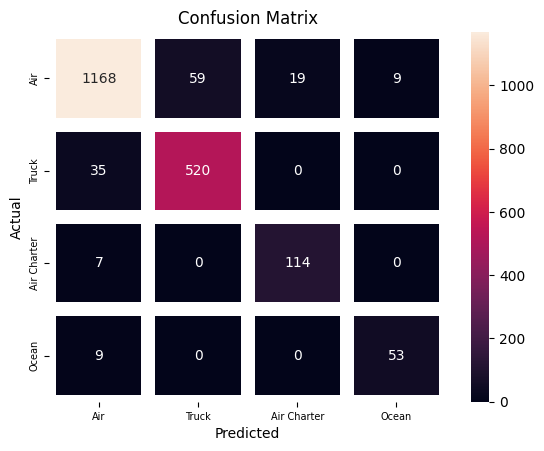

In [83]:
## Visualizing through Heatmap
sns.heatmap(cm,linewidths=10,fmt='g', annot=True)
plt.xticks(ticks = [0.5,1.5,2.5,3.5],labels=mapping_keys_list, fontsize=7)
plt.yticks(ticks = [0.5,1.5,2.5,3.5],labels=mapping_keys_list, fontsize=7)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Classification Report

In [74]:
mapping_keys = mapping.keys()
clr = classification_report(y_test,y_pred,labels=label_list, target_names=mapping_keys)
print("Classification Report_____________##\n\n",clr)

Classification Report_____________##

               precision    recall  f1-score   support

         Air       0.96      0.93      0.94      1255
       Truck       0.90      0.94      0.92       555
 Air Charter       0.86      0.94      0.90       121
       Ocean       0.85      0.85      0.85        62

    accuracy                           0.93      1993
   macro avg       0.89      0.92      0.90      1993
weighted avg       0.93      0.93      0.93      1993



So, the result is not too bad. Precision is representing out of all classes how many the model got right. Recall represents across all the class values for a single class, the modekl got right. f1 score is basically the combination of precision and recall. And support basically representing how many total datapoints we had for model calculations. So, more the data points, more accurate the model got. Like for Air charter it can be understood, the model got confused for some of the data with Air and Air Charter.